In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime
import os
%matplotlib inline

In [115]:


os.chdir("C:/Users/Ankit Hiremath/Downloads/archive")

In [116]:
train_data = pd.read_csv('AMD.csv')
train_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-05-22,4.43,4.43,4.25,4.26,4.26,8274300
1,2009-05-26,4.26,4.57,4.23,4.53,4.53,16094300
2,2009-05-27,4.57,4.80,4.55,4.71,4.71,21512600
3,2009-05-28,4.75,4.84,4.54,4.70,4.70,18383900
4,2009-05-29,4.71,4.78,4.38,4.54,4.54,24539700


In [117]:
train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2335 entries, 0 to 2334
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2335 non-null   object 
 1   Open       2335 non-null   float64
 2   High       2335 non-null   float64
 3   Low        2335 non-null   float64
 4   Close      2335 non-null   float64
 5   Adj Close  2335 non-null   float64
 6   Volume     2335 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 118.6+ KB


In [118]:
train_data.describe()


,Open,High,Low,Close,Adj Close,Volume
count,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2.335000e+03
mean,6.434732,6.563961,6.300887,6.433221,6.433221,3.107491e+07
std,3.872391,3.954999,3.792914,3.879124,3.879124,2.791149e+07
min,1.620000,1.690000,1.610000,1.620000,1.620000,0.000000e+00
25%,3.480000,3.550000,3.405000,3.465000,3.465000,1.421670e+07
50%,5.580000,5.720000,5.450000,5.600000,5.600000,2.228020e+07
75%,8.555000,8.710000,8.375000,8.565000,8.565000,3.776905e+07
max,25.510000,27.299999,24.629999,25.260000,25.260000,3.250584e+08


In [119]:
train_data['Date'] = pd.to_datetime(train_data['Date'])
train_data.set_index('Date', inplace=True)
train_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-05-22,4.43,4.43,4.25,4.26,4.26,8274300
2009-05-26,4.26,4.57,4.23,4.53,4.53,16094300
2009-05-27,4.57,4.80,4.55,4.71,4.71,21512600
2009-05-28,4.75,4.84,4.54,4.70,4.70,18383900
2009-05-29,4.71,4.78,4.38,4.54,4.54,24539700


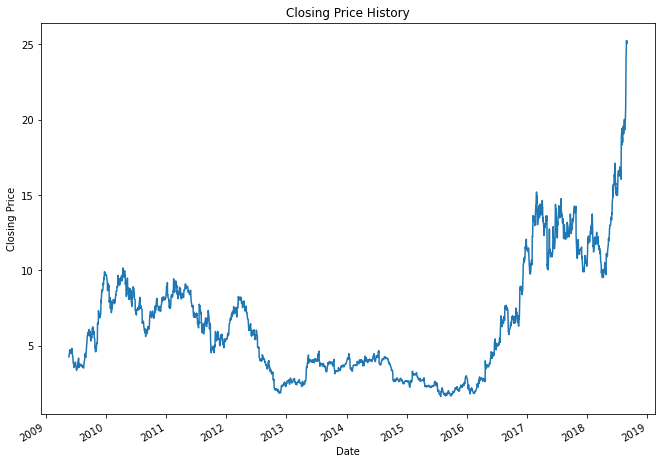

In [120]:
plt.figure(figsize=(11, 8)) # resizing the plot
train_data['Adj Close'].plot()
plt.title('Closing Price History') # adding a title
plt.xlabel('Date') # x label
plt.ylabel('Closing Price') # y label
plt.show()

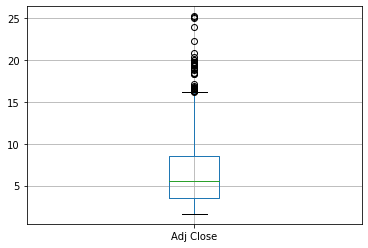

In [121]:
train_data.boxplot(column=['Adj Close'])


<Figure size 1008x504 with 0 Axes>

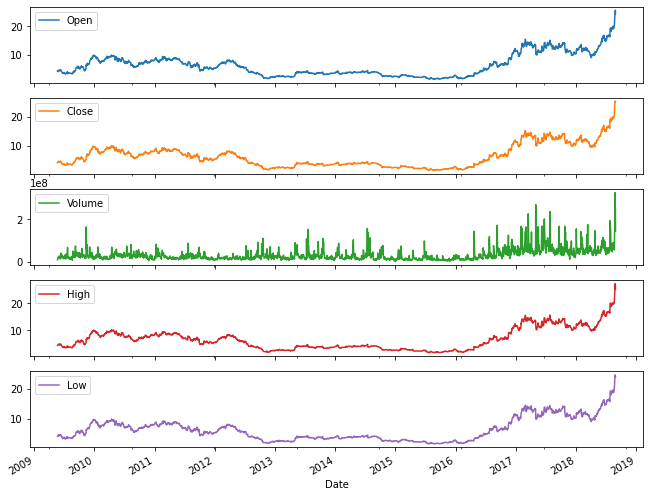

In [122]:
plt.figure(figsize=(14, 7)) # resizing the plot
cols = ['Open', 'Close', 'Volume', 'High', 'Low']
axes = train_data[cols].plot(figsize=(11, 9), subplots = True)
plt.show()

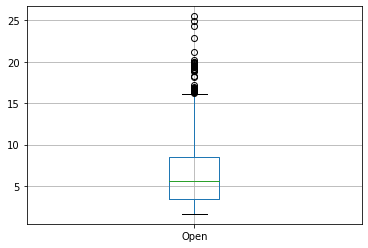

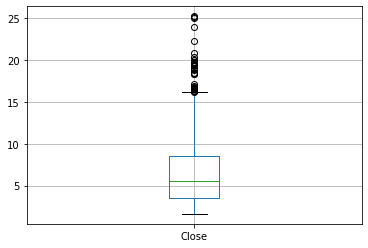

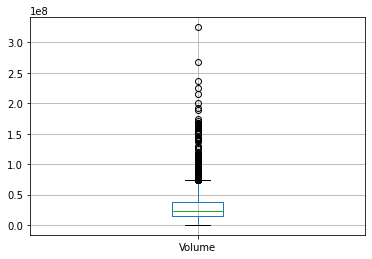

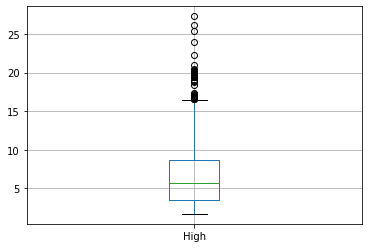

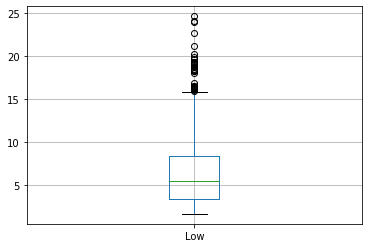

In [123]:
cols = ['Open', 'Close', 'Volume', 'High', 'Low']
for i in cols:
 plt.subplots()
 axes = train_data.boxplot(column= [i])
plt.show()

In [124]:
train_data.corr()


,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999364,0.999352,0.998658,0.998658,0.579491
High,0.999364,1.000000,0.999261,0.999427,0.999427,0.590739
Low,0.999352,0.999261,1.000000,0.999423,0.999423,0.569752
Close,0.998658,0.999427,0.999423,1.000000,1.000000,0.579457
Adj Close,0.998658,0.999427,0.999423,1.000000,1.000000,0.579457
Volume,0.579491,0.590739,0.569752,0.579457,0.579457,1.000000


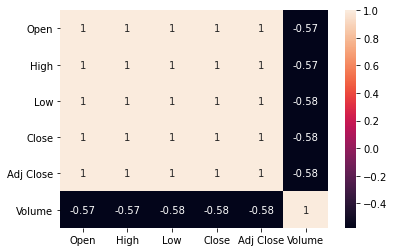

In [125]:
sns.heatmap(corr, annot=True)


In [126]:
train_data['HL_PCT'] = (train_data['High'] - train_data['Low']) / train_data['Low'] * 100.0 # high-low percentage
train_data['PCT_change'] = (train_data['Close'] - train_data['Open']) / train_data['Open'] * 100.0 # open-close percentage


In [127]:
train_data.shape


(2335, 8)

In [128]:
train_data.isnull().sum()


Open          0
High          0
Low           0
Close         0
Adj Close     0
Volume        0
HL_PCT        0
PCT_change    0
dtype: int64

In [129]:
df = train_data[['HL_PCT', 'PCT_change', 'Adj Close','Volume']]


In [130]:
forecast_out = int(math.ceil(0.05 * len(df))) # forcasting out 5% of the entire dataset
print(forecast_out)
df['label'] = df['Adj Close'].shift(-forecast_out)

117


<ipython-input-130-8a15e8de9d0b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df['Adj Close'].shift(-forecast_out)


In [131]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error

In [132]:
scaler = StandardScaler()
#Now we scale the data between -1 and 1 in order to put all columns in the dataset in the same range.

In [133]:
X = np.array(df.drop(['label'], 1))
scaler.fit(X)
X = scaler.transform(X)

In [134]:
X_Predictions = X[-forecast_out:] # data to be predicted
X = X[:-forecast_out] # data to be trained

In [135]:
X.shape


(2218, 4)

In [136]:
df.dropna(inplace=True)


<ipython-input-136-c64f9f573c18>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [137]:
y = np.array(df['label'])
y.shape


(2218,)

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
#train test split

In [139]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [140]:
rf_confidence = rf.score(X_test, y_test)


In [141]:
rf_confidence


0.7229208298315257

In [142]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_confidence = lr.score(X_test, y_test)
lr_confidence
#accuracy of random forest was better than linear

0.5835891763905776

In [143]:
last_date = df.index[-1] #getting the lastdate in the dataset
last_unix = last_date.timestamp() #converting it to time in seconds
one_day = 86400 #one day equals 86400 seconds
next_unix = last_unix + one_day # getting the time in seconds for the next day

In [144]:
forecast_set = rf.predict(X_Predictions) # predicting forecast data
df['Forecast'] = np.nan

<ipython-input-144-62adc2e3b393>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Forecast'] = np.nan


In [145]:
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

c:\users\ankit hiremath\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


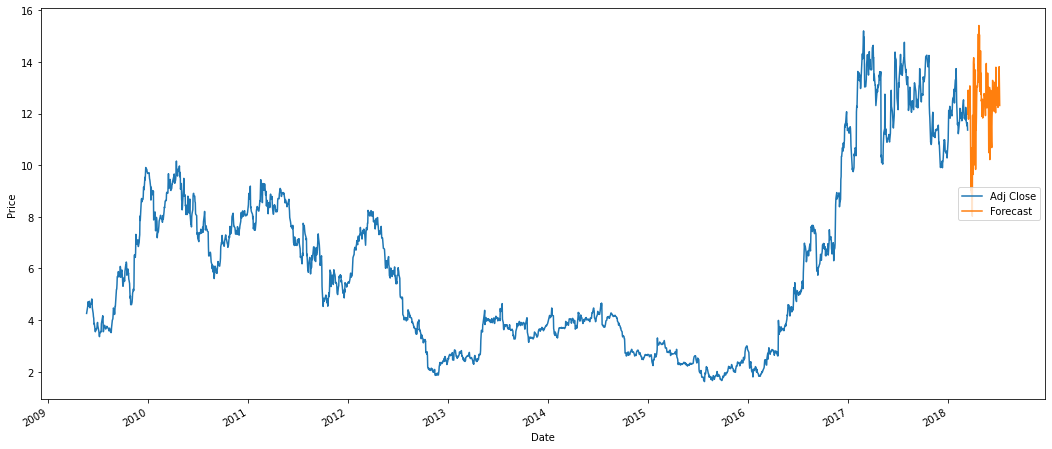

In [146]:
plt.figure(figsize=(18, 8))
df['Adj Close'].plot()
df['Forecast'].plot()
plt.legend(loc=5)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

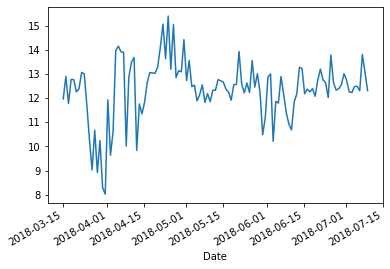

In [147]:
df['Forecast'].plot()
